In [1]:
import os

if os.getcwd() == '/Users/matildamwendwa/Desktop/Desktop - Admin’s MacBook Pro/Python_Projects/microvision/notebooks':
    os.chdir('/Users/matildamwendwa/Desktop/Desktop - Admin’s MacBook Pro/Python_Projects/microvision')
    print("Changed!!")

print("Current working directory:", os.getcwd())

os.environ["TOKENIZERS_PARALLELISM"] = "false"

Changed!!
Current working directory: /Users/matildamwendwa/Desktop/Desktop - Admin’s MacBook Pro/Python_Projects/microvision


In [2]:
from pathlib import Path
import sqlite3
import pandas as pd
import math

# Prefer configured defaults from config.settings when available
try:
    from config.settings import settings
    EDGES_DB = Path(getattr(settings, "DEFAULT_DB", "data/edges/edges.db"))
    MERGED_NODES = Path("data/merged_templates.csv")  # usually written by pipeline
except Exception:
    EDGES_DB = Path("data/edges/edges.db")
    MERGED_NODES = Path("data/merged_templates.csv")

print("Edges DB:", EDGES_DB)
print("Merged nodes CSV:", MERGED_NODES)


Edges DB: data/edges/edges.db
Merged nodes CSV: data/merged_templates.csv


In [3]:
# Cell 2: load edges (adjust limit if you want more rows)
limit = None  # set to an int to limit rows for quick inspection, or None to load all
if not EDGES_DB.exists():
    raise FileNotFoundError(f"Edges DB not found: {EDGES_DB}")

with sqlite3.connect(str(EDGES_DB)) as conn:
    # list tables
    tables = [r[0] for r in conn.execute("SELECT name FROM sqlite_master WHERE type='table'").fetchall()]
    print("DB tables:", tables)
    # choose table name (common name: 'edges')
    table = "edges" if "edges" in tables else (tables[0] if tables else None)
    if table is None:
        raise RuntimeError("No table found in edges DB")
    sql = f"SELECT * FROM {table}" + (f" LIMIT {int(limit)}" if limit else "")
    edges_df = pd.read_sql_query(sql, conn)

print("Loaded edges:", len(edges_df))
print("Columns:", edges_df.columns.tolist())
display(edges_df.head(len(edges_df)))

DB tables: ['edges', 'sqlite_sequence', 'transitions']
Loaded edges: 209
Columns: ['id', 'source_index', 'source_id', 'target_id', 'source_timestamp', 'target_timestamp', 'time_delta_ms', 'retrieval_distance', 'retrieval_similarity', 'semantic_cosine', 'hybrid_score', 'alpha', 'target_metadata', 'created_at', 'source_timestamp_canonical', 'target_timestamp_canonical', 'target_semantic_text', 'target_component', 'target_service', 'source_component', 'source_service']


,id,source_index,source_id,target_id,source_timestamp,target_timestamp,time_delta_ms,retrieval_distance,retrieval_similarity,semantic_cosine,...,alpha,target_metadata,created_at,source_timestamp_canonical,target_timestamp_canonical,target_semantic_text,target_component,target_service,source_component,source_service
0,1,0,1,1,2017-05-17T00:32:24Z,2017-05-17T00:32:24Z,0.0,0.000000,1.000000,1.000000,...,0.5,"{""service_display"": ""Nova Compute"", ""timestamp...",2025-11-27 13:01:56,2017-05-17T00:32:24Z,2017-05-17T00:32:24Z,req_id-id -auditing locally available compute ...,"[""nova.compute.resource_tracker""]",nova-compute,nova.compute.resource_tracker,nova-compute
1,2,0,1,10,2017-05-17T00:32:24Z,2017-05-16T17:30:15Z,-25329000.0,0.680814,0.319186,0.477192,...,0.5,"{""timestamp"": ""2017-05-16T17:30:15Z"", ""semanti...",2025-11-27 13:01:56,2017-05-17T00:32:24Z,2017-05-16T17:30:15Z,req_id-id -final resource view: name=cp-1.slow...,"[""nova.compute.resource_tracker""]",nova-compute,nova.compute.resource_tracker,nova-compute
2,3,0,1,15,2017-05-17T00:32:24Z,2017-05-16T21:41:38Z,-10246000.0,0.761073,0.238927,0.361013,...,0.5,"{""level"": ""INFO"", ""timestamps"": ""[\""2017-05-16...",2025-11-27 13:01:56,2017-05-17T00:32:24Z,2017-05-16T21:41:38Z,req_id-id -the instance sync for host cp-1.slo...,"[""nova.scheduler.host_manager""]",nova-scheduler,nova.compute.resource_tracker,nova-compute
3,4,0,1,8,2017-05-17T00:32:24Z,2017-05-16T18:03:03Z,-23361000.0,0.931457,0.068543,0.463695,...,0.5,"{""timestamp"": ""2017-05-16T18:03:03Z"", ""compone...",2025-11-27 13:01:56,2017-05-17T00:32:24Z,2017-05-16T18:03:03Z,req_id-id -instance: id attempting claim: memo...,"[""nova.compute.claims""]",nova-compute,nova.compute.resource_tracker,nova-compute
4,5,0,1,19,2017-05-17T00:32:24Z,2017-05-16T17:11:25Z,-26459000.0,0.969852,0.030148,0.659593,...,0.5,"{""service"": ""nova-api"", ""service_token"": ""nova...",2025-11-27 13:01:56,2017-05-17T00:32:24Z,2017-05-16T17:11:25Z,req_id-id -ip get /v2/id/servers/detail http s...,"[""nova.osapi_compute.wsgi.server""]",nova-api,nova.compute.resource_tracker,nova-compute
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,205,23,9,3,2017-05-16T19:48:30Z,2017-05-16T12:24:48Z,-26622000.0,0.812480,0.187520,0.485109,...,0.5,"{""level"": ""INFO"", ""template_id"": ""12"", ""timest...",2025-11-27 13:01:56,2017-05-16T19:48:30Z,2017-05-16T12:24:48Z,req_id-id -instance: id took 0.49 seconds to d...,"[""nova.compute.manager""]",nova-compute,nova.virt.libvirt.driver,nova-compute
205,206,23,9,13,2017-05-16T19:48:30Z,2017-05-16T02:24:45Z,-62625000.0,0.827746,0.172254,0.501627,...,0.5,"{""semantic_text"": ""req_id-id -base or swap fil...",2025-11-27 13:01:56,2017-05-16T19:48:30Z,2017-05-16T02:24:45Z,req_id-id -base or swap file too young to remo...,"[""nova.virt.libvirt.imagecache""]",nova-compute,nova.virt.libvirt.driver,nova-compute
206,207,23,9,16,2017-05-16T19:48:30Z,2017-05-17T01:53:26Z,21896000.0,0.905171,0.094829,0.537765,...,0.5,"{""timestamp"": ""2017-05-17T01:53:26Z"", ""service...",2025-11-27 13:01:56,2017-05-16T19:48:30Z,2017-05-17T01:53:26Z,- instance: id during sync_power_state the ins...,"[""nova.compute.manager""]",nova-compute,nova.virt.libvirt.driver,nova-compute
207,208,23,9,7,2017-05-16T19:48:30Z,2017-05-16T16:59:35Z,-10135000.0,0.924469,0.075531,0.650075,...,0.5,"{""service_token"": ""nova.compute"", ""service_dis...",2025-11-27 13:01:56,2017-05-16T19:48:30Z,2017-05-16T16:59:35Z,req_id-id -instance: id took 21.09 seconds to ...,"[""nova.compute.manager""]",nova-compute,nova.virt.libvirt.driver,nova-compute


In [4]:
# Cell 3: missing values and key stats
cols_of_interest = ["source_id", "target_id", "source_timestamp", "target_timestamp", "time_delta_ms", "semantic_cosine", "hybrid_score"]
present = [c for c in cols_of_interest if c in edges_df.columns]
print("Present diagnostic columns:", present)

na_counts = edges_df[present].isna().sum()
print("NA counts:\n", na_counts)

# Basic numeric summaries for scores / time_delta
for numcol in ("time_delta_ms", "semantic_cosine", "hybrid_score"):
    if numcol in edges_df.columns:
        s = edges_df[numcol].dropna()
        if len(s):
            print(f"{numcol}: count={len(s)}, mean={s.mean():.4f}, min={s.min():.4f}, max={s.max():.4f}")
        else:
            print(f"{numcol}: no non-null values")

# show edges with missing source_id but present target (common debugging cue)
if "source_id" in edges_df.columns and "target_id" in edges_df.columns:
    problem_edges = edges_df[edges_df["source_id"].isna() & edges_df["target_id"].notna()]
    print("Edges with missing source_id (sample up to 10):", len(problem_edges))
    display(problem_edges.head(10))

Present diagnostic columns: ['source_id', 'target_id', 'source_timestamp', 'target_timestamp', 'time_delta_ms', 'semantic_cosine', 'hybrid_score']
NA counts:
 source_id           0
target_id           0
source_timestamp    0
target_timestamp    0
time_delta_ms       0
semantic_cosine     0
hybrid_score        0
dtype: int64
time_delta_ms: count=209, mean=540429899.5215, min=-112911503000.0000, max=112937962000.0000
semantic_cosine: count=209, mean=0.5394, min=0.2432, max=1.0000
hybrid_score: count=209, mean=0.4195, min=0.2011, max=1.0000
Edges with missing source_id (sample up to 10): 0


,id,source_index,source_id,target_id,source_timestamp,target_timestamp,time_delta_ms,retrieval_distance,retrieval_similarity,semantic_cosine,...,alpha,target_metadata,created_at,source_timestamp_canonical,target_timestamp_canonical,target_semantic_text,target_component,target_service,source_component,source_service


In [5]:
# Cell 4: load merged node metadata, optionally merge onto node attributes
nodes_df = None
if MERGED_NODES.exists():
    try:
        nodes_df = pd.read_csv(MERGED_NODES, dtype=str)
        print("Loaded merged nodes:", len(nodes_df), "columns:", nodes_df.columns.tolist())
    except Exception as e:
        print("Could not read merged nodes CSV:", e)
else:
    print("Merged nodes CSV not found at", MERGED_NODES)

# If nodes_df contains 'template_id' or 'template_id' style key, display sample
if nodes_df is not None:
    id_col_candidates = [c for c in nodes_df.columns if c.lower() in ("template_id","template","id")]
    print("Candidate ID columns in nodes:", id_col_candidates)
    display(nodes_df.head(5))

Loaded merged nodes: 24 columns: ['semantic_text', 'template_id', 'template_ids', 'occurrences', 'service', 'component', 'level', 'timestamp', 'timestamp_canonical']
Candidate ID columns in nodes: ['template_id']


,semantic_text,template_id,template_ids,occurrences,service,component,level,timestamp,timestamp_canonical
0,req_id-id -auditing locally available compute ...,1,['1'],5610,nova-compute,nova.compute.resource_tracker,INFO,"['2017-05-16T22:26:14+00:00', '2017-05-14T21:2...",2017-05-17T00:32:24Z
1,req_id-id -instance: id vcpu limit not specifi...,10,['10'],26624,nova-compute,nova.compute.claims,INFO,"['2017-05-14T20:13:40+00:00', '2017-05-16T03:4...",2017-05-16T19:44:56Z
2,req_id-id -http exception thrown: no instances...,11,['11'],576,nova-api,nova.api.openstack.wsgi,INFO,"['2017-05-16T22:09:57+00:00', '2017-05-16T02:3...",2017-05-16T15:54:17Z
3,req_id-id -instance: id took 0.49 seconds to d...,12,['12'],196,nova-compute,nova.compute.manager,INFO,"['2017-05-16T18:41:35+00:00', '2017-05-16T01:5...",2017-05-16T12:24:48Z
4,req_id-id -instance: id during sync_power_stat...,13,['13'],2401,nova-compute,nova.compute.manager,INFO,"['2017-05-17T02:33:34+00:00', '2017-05-17T05:0...",2017-05-16T19:36:11Z


In [6]:
# Cell 5: build NetworkX directed graph from edges_df
import networkx as nx

# choose source/target column names robustly
src_col = "source_id" if "source_id" in edges_df.columns else ("source" if "source" in edges_df.columns else None)
tgt_col = "target_id" if "target_id" in edges_df.columns else ("target" if "target" in edges_df.columns else None)
if src_col is None or tgt_col is None:
    raise RuntimeError("Could not find source/target columns in edges dataframe")

G = nx.DiGraph()
# Add nodes with optional attributes (if nodes_df is available)
if nodes_df is not None and len(nodes_df) > 0:
    # find id column
    node_id_col = next((c for c in nodes_df.columns if c.lower() in ("template_id","id","template")), None)
    if node_id_col:
        for _, row in nodes_df.iterrows():
            nid = str(row[node_id_col])
            attr = row.to_dict()
            G.add_node(nid, **attr)

# Add edges (optionally limit to avoid huge graph visualizations)
max_edges_to_add = 10000  # safe cap; increase if necessary
for i, row in enumerate(edges_df.itertuples(index=False, name="R")):
    if i >= max_edges_to_add:
        break
    s = getattr(row, src_col)
    t = getattr(row, tgt_col)
    if s is None or (isinstance(s, float) and math.isnan(s)):
        continue
    if t is None or (isinstance(t, float) and math.isnan(t)):
        continue
    s = str(s); t = str(t)
    # attach edge attributes: scores/time_delta if present
    edge_attr = {}
    for c in ("hybrid_score", "semantic_cosine", "time_delta_ms"):
        if c in edges_df.columns:
            edge_attr[c] = float(edges_df.iloc[i][c]) if pd.notna(edges_df.iloc[i][c]) else None
    G.add_edge(s, t, **edge_attr)

print("Graph nodes:", G.number_of_nodes(), "edges:", G.number_of_edges())

# compute degree centrality and show top nodes by out-degree and in-degree
out_deg = sorted(G.out_degree(), key=lambda kv: kv[1], reverse=True)[:10]
in_deg = sorted(G.in_degree(), key=lambda kv: kv[1], reverse=True)[:10]
print("Top out-degree nodes:", out_deg)
print("Top in-degree nodes:", in_deg)

Graph nodes: 24 edges: 205
Top out-degree nodes: [('10', 10), ('12', 10), ('13', 10), ('15', 10), ('16', 10), ('17', 10), ('2', 10), ('20', 10), ('4', 10), ('6', 10)]
Top in-degree nodes: [('8', 18), ('11', 16), ('18', 15), ('4', 13), ('6', 13), ('1', 12), ('23', 12), ('7', 11), ('13', 9), ('21', 9)]


Subgraph nodes: 23 edges: 198


/var/folders/cg/117j5m2j5bj2p80hw2fxf0m40000gq/T/ipykernel_67199/2996211868.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab10", len(unique_services))


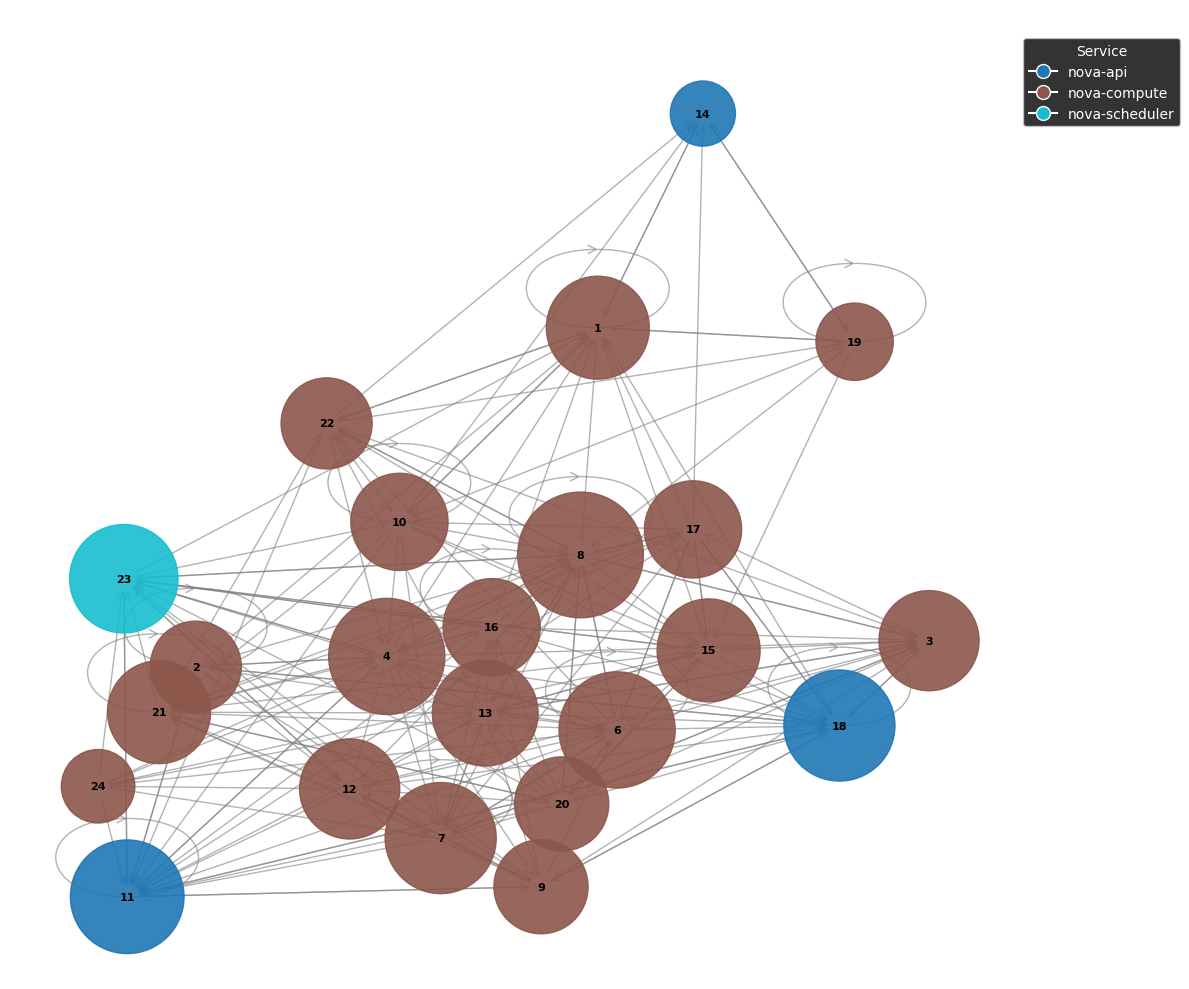

In [7]:
# Cell 6: static visualization of a subgraph using matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Pick a subgraph: top nodes by degree union with their neighbors
top_nodes = [n for n, d in out_deg[:8]] + [n for n, d in in_deg[:8]]
top_nodes = list(dict.fromkeys(top_nodes))  # unique preserving order
sub_nodes = set(top_nodes)
for n in top_nodes:
    sub_nodes.update(list(G.successors(n))[:5])
    sub_nodes.update(list(G.predecessors(n))[:5])

SG = G.subgraph(list(sub_nodes)).copy()
print("Subgraph nodes:", SG.number_of_nodes(), "edges:", SG.number_of_edges())

plt.figure(facecolor="white", figsize=(12, 10))
pos = nx.spring_layout(SG, seed=42, k=0.5)  # k controls spacing

# Color nodes by service if available
node_colors = []
services = []
for n in SG.nodes():
    s = SG.nodes[n].get("service", "Unknown")
    services.append(s)

unique_services = list(set(services))
color_map = plt.cm.get_cmap("tab10", len(unique_services))
service_to_color = {s: color_map(i) for i, s in enumerate(unique_services)}
node_colors = [service_to_color[s] for s in services]

# Draw
nx.draw_networkx_nodes(SG, pos, node_size=[100 + 300 * (SG.degree(n)) for n in SG.nodes()], node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(SG, pos, arrowstyle="->", arrowsize=15, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(SG, pos, font_size=8, font_weight="bold")

# Legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=service_to_color[s], label=s, markersize=10) for s in unique_services]
plt.legend(handles=handles, title="Service", loc="upper left", bbox_to_anchor=(1, 1))

plt.title("Semantic Dependency Subgraph (Top Nodes)")
plt.axis("off")
plt.tight_layout()
plt.show()


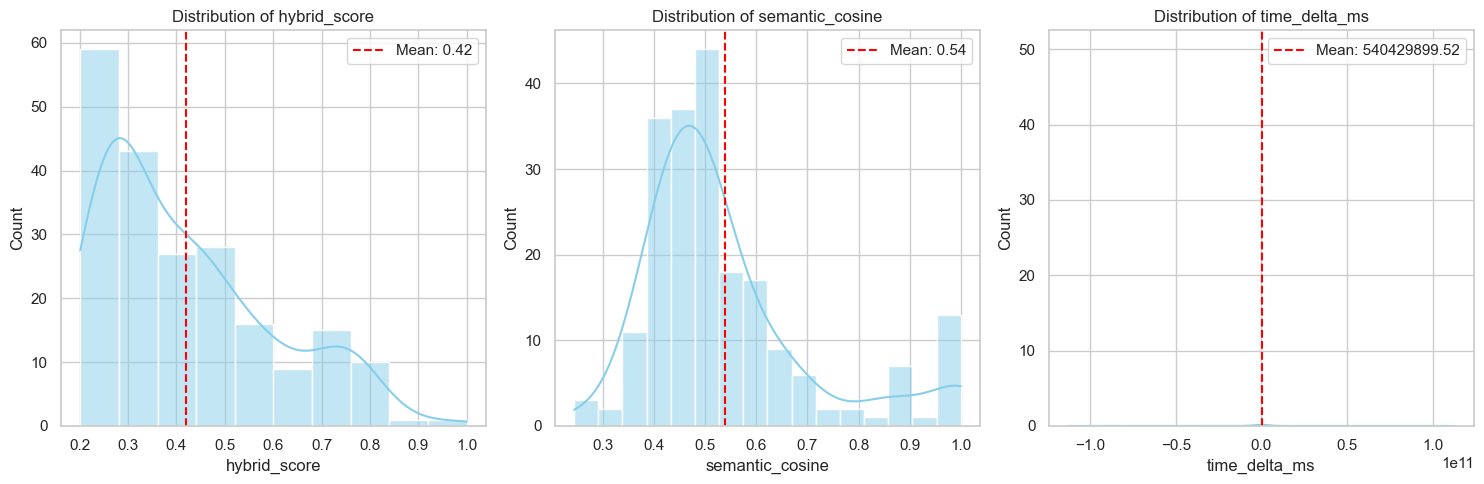

In [8]:
# Cell 7: Visualize Edge Score Distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="whitegrid")

# Columns to visualize
score_cols = ["hybrid_score", "semantic_cosine", "time_delta_ms"]
present_cols = [c for c in score_cols if c in edges_df.columns]

if present_cols:
    fig, axes = plt.subplots(1, len(present_cols), figsize=(15, 5))
    if len(present_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(present_cols):
        sns.histplot(data=edges_df, x=col, kde=True, ax=axes[i], color="skyblue")
        axes[i].set_title(f"Distribution of {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Count")
        
        # Add mean line
        mean_val = edges_df[col].mean()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].legend()

    plt.tight_layout()
    plt.show()
else:
    print("No score columns found to visualize.")


Ground Truth Edges: 1
Inferred Edges: 4


/var/folders/cg/117j5m2j5bj2p80hw2fxf0m40000gq/T/ipykernel_67199/3883500086.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="Metric", y="Value", palette="viridis")


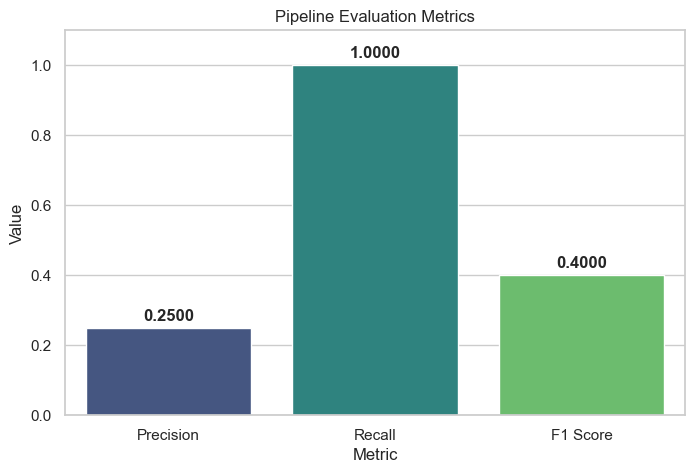

Correct Matches (TP): 1
Sample Ground Truth Edges: [('nova-compute', 'nova-api')]
Sample Inferred Edges: [('nova-api', 'nova-compute'), ('nova-scheduler', 'nova-compute'), ('nova-compute', 'nova-scheduler'), ('nova-compute', 'nova-api')]


In [9]:
# Cell 8: Evaluation Metrics (Precision, Recall, F1)
# Replicating logic from scripts/evaluate_pipeline.py to show metrics inline

def load_parsed_logs_local(csv_path):
    if not csv_path.exists():
        print(f"Parsed logs not found at {csv_path}")
        return pd.DataFrame()
    df = pd.read_csv(csv_path)
    
    # Fix for OpenStack logs service extraction
    if 'raw' in df.columns:
        extracted_service = df['raw'].astype(str).str.extract(r'^"?([a-zA-Z0-9-]+)\.log')
        if not extracted_service.empty and extracted_service[0].notna().any():
            df['service'] = extracted_service[0]
            
    # Fallback
    if 'component' in df.columns and 'service' not in df.columns:
         df['service'] = df['component']
         
    # Filter valid reqids
    if 'reqid' in df.columns:
        df = df.dropna(subset=['reqid'])
        df = df[df['reqid'] != '']
        df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df

def generate_ground_truth_local(df):
    ground_truth_edges = set()
    if 'reqid' not in df.columns or 'service' not in df.columns:
        return ground_truth_edges
        
    grouped = df.groupby('reqid')
    for reqid, group in grouped:
        if len(group) < 2:
            continue
        sorted_group = group.sort_values('timestamp')
        services = sorted_group['service'].tolist()
        for i in range(len(services) - 1):
            src = services[i]
            dst = services[i+1]
            if src != dst:
                ground_truth_edges.add((src, dst))
    return ground_truth_edges

# Load parsed logs
parsed_path = Path("data/parsed_sample.csv")
parsed_df = load_parsed_logs_local(parsed_path)

if not parsed_df.empty:
    # Generate Ground Truth
    ground_truth = generate_ground_truth_local(parsed_df)
    print(f"Ground Truth Edges: {len(ground_truth)}")
    
    # Get Inferred Edges from loaded edges_df
    # Use source_service/target_service if available
    inferred_edges = set()
    src_col = "source_service" if "source_service" in edges_df.columns else "source_component"
    tgt_col = "target_service" if "target_service" in edges_df.columns else "target_component"
    
    if src_col in edges_df.columns and tgt_col in edges_df.columns:
        for _, row in edges_df.iterrows():
            s = row[src_col]
            t = row[tgt_col]
            if pd.notna(s) and pd.notna(t) and s != t:
                inferred_edges.add((s, t))
    
    print(f"Inferred Edges: {len(inferred_edges)}")
    
    # Calculate Metrics
    tp = ground_truth.intersection(inferred_edges)
    tp_count = len(tp)
    precision = tp_count / len(inferred_edges) if len(inferred_edges) > 0 else 0.0
    recall = tp_count / len(ground_truth) if len(ground_truth) > 0 else 0.0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    
    # Visualize Metrics
    metrics_data = {
        "Metric": ["Precision", "Recall", "F1 Score"],
        "Value": [precision, recall, f1]
    }
    metrics_df = pd.DataFrame(metrics_data)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(data=metrics_df, x="Metric", y="Value", palette="viridis")
    plt.ylim(0, 1.1)
    plt.title("Pipeline Evaluation Metrics")
    for i, v in enumerate(metrics_df["Value"]):
        plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontweight='bold')
    plt.show()
    
    print(f"Correct Matches (TP): {tp_count}")
    if len(ground_truth) > 0:
        print("Sample Ground Truth Edges:", list(ground_truth)[:5])
    if len(inferred_edges) > 0:
        print("Sample Inferred Edges:", list(inferred_edges)[:5])

else:
    print("Could not load parsed logs for evaluation.")
